In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

import gym
import d4rl

from rlkit.torch.networks import Mlp
import seaborn as sns
import matplotlib.pyplot as plt

No module named 'flow'
(65544) b'X11: The DISPLAY environment variable is missing'
No module named 'carla'


In [2]:
def get_bonus(obs, actions, network, target_network):
    x = torch.from_numpy(obs)
    y = torch.from_numpy(actions)
    data = torch.cat((x, y), dim=1)
    print('size of data:{}'.format(data.size()))
    
    out1 = network(data)
    out2 = target_network(data)
    bonus = abs(out1 - out2)
    print('size of bonus:{}'.format(bonus.size()))
    
    return bonus

In [3]:
def load_models(model_name):
    
    M = 64
    network = Mlp(
        input_size=obs_dim + action_dim,
        output_size=1,
        hidden_sizes=[M, M],
    )

    target_network = Mlp(
    input_size=obs_dim + action_dim,
    output_size=1,
    hidden_sizes=[M, M],
    )
    
    path = '../models/{}'.format(model_name)
    checkpoint = torch.load(path, map_location='cpu')
    network.load_state_dict(checkpoint['network_state_dict'])
    target_network.load_state_dict(checkpoint['target_state_dict'])

    print('Loading model: {}'.format(path))
    
    return network, target_network

In [19]:
env_name = 'halfcheetah-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']


17
6


In [20]:
model_name = 'Nov-03-2020_1648_halfcheetah-medium-v0.pt'
network, target_network = load_models(model_name)
bonus = get_bonus(obs, actions, network, target_network).detach().cpu().numpy()

Loading model: ../models/Nov-03-2020_1648_halfcheetah-medium-v0.pt
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


<AxesSubplot:ylabel='Count'>

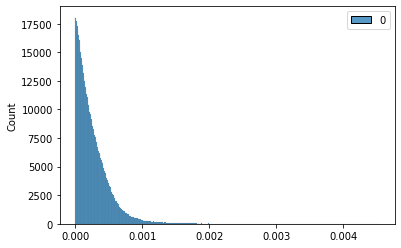

In [21]:
sns.histplot(bonus)


<AxesSubplot:ylabel='Count'>

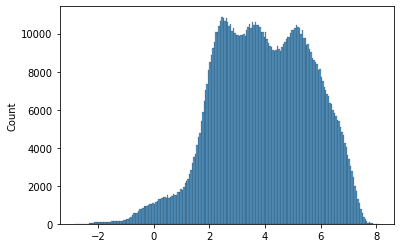

In [22]:
sns.histplot(rewards)

In [23]:
reward_rng = max(rewards) - min(rewards)
bonus_rng = max(bonus) - min(bonus)

print('range bonus:{}, rewards:{}'.format(bonus_rng, reward_rng))

range bonus:[0.00454132], rewards:10.932053565979004


In [24]:
scale = reward_rng / bonus_rng
w = 2.5
print('scale:{}'.format(scale))
print('beta:{}'.format(w * scale))

scale:[2407.2402]
beta:[6018.1006]


In [25]:
ind = np.random.permutation(actions.shape[0])
shuffled_actions = actions[ind]

bonus_shuffled = get_bonus(obs, shuffled_actions, network, target_network).detach().cpu().numpy()


size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


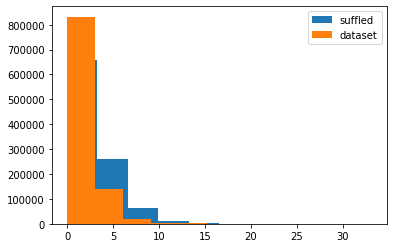

In [36]:
plt.hist(beta * bonus_shuffled, label='suffled')
plt.hist(beta * bonus, label='dataset')
plt.legend(loc='upper right')


In [33]:
N = 1000000
obs_sample = obs[:N,]
action_sample = actions[:N]
random_action_sample = np.random.rand(action_sample.shape[0], action_sample.shape[1]).astype(action_sample.dtype)


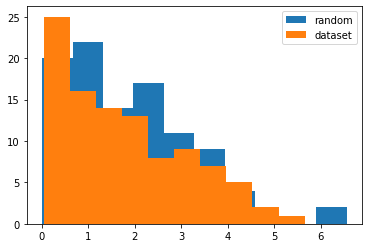

In [37]:
plt.hist(beta * bonus_random, label='random')
plt.hist(beta * bonus_dataset, label='dataset')
plt.legend(loc='upper right')


## hopper-medium

In [55]:
env_name = 'hopper-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']

11
3


In [58]:
model_name = 'Nov-09-2020_1517_hopper-medium-v0.pt'
network, target_network = load_models(model_name)
bonus = get_bonus(obs, actions, network, target_network).detach().cpu().numpy()

Loading model: ../models/Nov-09-2020_1517_hopper-medium-v0.pt
size of data:torch.Size([1000000, 14])
size of bonus:torch.Size([1000000, 1])


<AxesSubplot:ylabel='Count'>

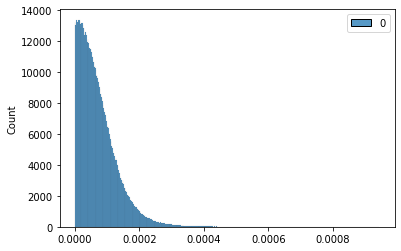

In [59]:
sns.histplot(bonus)

<AxesSubplot:ylabel='Count'>

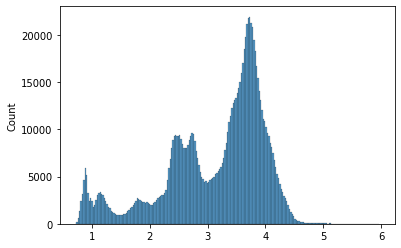

In [60]:
sns.histplot(rewards)

In [61]:
reward_rng = max(rewards) - min(rewards)
bonus_rng = max(bonus) - min(bonus)

print('range bonus:{}, rewards:{}'.format(bonus_rng, reward_rng))

range bonus:[0.00094356], rewards:5.25816535949707


In [62]:
scale = reward_rng / bonus_rng
w = 2.5
print('scale:{}'.format(scale))
print('beta:{}'.format(w * scale))

scale:[5572.6934]
beta:[13931.733]


## Walker2d-medium


In [49]:
env_name = 'walker2d-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

17
6


In [50]:
dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']

In [63]:
model_name = 'Nov-19-2020_1043_walker2d-medium-v0.pt'
# model_name = 'Nov-19-2020_1225_walker2d-medium-v0.pt'
network, target_network = load_models(model_name)



Loading model: ../models/Nov-19-2020_1043_walker2d-medium-v0.pt


In [52]:
bonus = get_bonus(obs, actions, network, target_network).detach().cpu().numpy()

size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


In [53]:
reward_rng = max(rewards) - min(rewards)
bonus_rng = max(bonus) - min(bonus)

print('range bonus:{}, rewards:{}'.format(bonus_rng, reward_rng))



range bonus:[0.00269148], rewards:14.513020515441895


In [54]:
scale = reward_rng / bonus_rng
w = 2.5
beta = w * scale
print('scale:{}'.format(scale))
print('beta:{}'.format(beta))

scale:[5392.201]
beta:[13480.503]


In [55]:
ind = np.random.permutation(actions.shape[0])
shuffled_actions = actions[ind]

bonus_shuffled = get_bonus(obs, shuffled_actions, network, target_network).detach().cpu().numpy()


size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


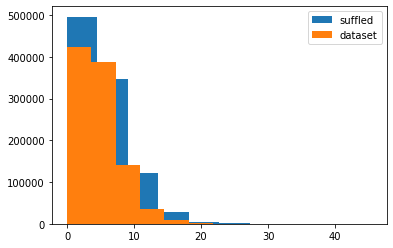

In [56]:
plt.hist(beta * bonus_shuffled, label='suffled')
plt.hist(beta * bonus, label='dataset')
plt.legend(loc='upper right')


In [66]:
bonus_shuffled = get_bonus(obs, shuffled_actions, network, target_network).detach().cpu().numpy()


size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


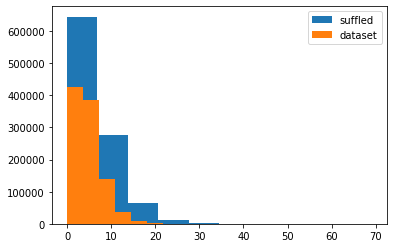

In [67]:
plt.hist(beta * bonus_shuffled, label='suffled')
plt.hist(beta * bonus, label='dataset')
plt.legend(loc='upper right')

In [60]:
N = 1000000
obs_sample = obs[:N,]
action_sample = actions[:N]
random_action_sample = np.random.rand(action_sample.shape[0], action_sample.shape[1]).astype(action_sample.dtype)


In [61]:
bonus_dataset = get_bonus(obs_sample, action_sample, network, target_network).detach().cpu().numpy()
bonus_random = get_bonus(obs_sample, random_action_sample, network, target_network).detach().cpu().numpy()


size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


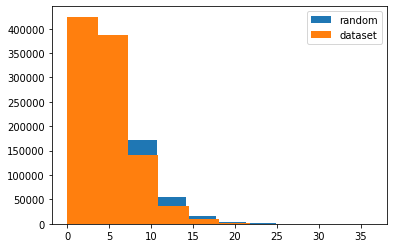

In [62]:
plt.hist(beta * bonus_random, label='random')
plt.hist(beta * bonus_dataset, label='dataset')
plt.legend(loc='upper right')


In [64]:
bonus_random = get_bonus(obs_sample, random_action_sample, network, target_network).detach().cpu().numpy()


size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


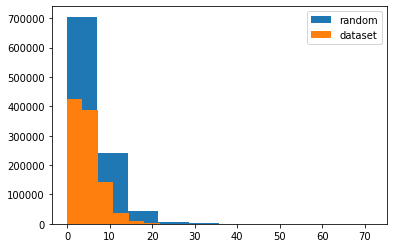

In [65]:
plt.hist(beta * bonus_random, label='random')
plt.hist(beta * bonus_dataset, label='dataset')
plt.legend(loc='upper right')